In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
train_df=pd.read_csv('train_cleaned.csv')
test_df=pd.read_csv('test_cleaned.csv')


In [3]:
train_df.head()

,month,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,type_of_loan,...,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score,credit_history_months
0,3,0.056860,13,0.000501,0.102074,0.002223,0.002668,0.000345,0.065615,6,...,0.162020,0.204039,180,1,0.000602,0.008042,2,0.195060,0,0.0
1,0,0.056860,13,0.000501,0.187504,0.002223,0.002668,0.000345,0.065615,6,...,0.162020,0.360476,185,1,0.000602,0.019946,5,0.139479,0,0.0
2,7,0.056860,13,0.000501,0.102074,0.002223,0.002668,0.000345,0.065615,6,...,0.162020,0.134487,186,1,0.000602,0.004142,1,0.213159,0,0.0
3,5,0.056860,13,0.000501,0.187504,0.002223,0.002668,0.000345,0.065615,6,...,0.162020,0.219137,187,1,0.000602,0.006243,6,0.212528,0,0.0
4,2,0.057404,14,0.001151,0.183478,0.001668,0.002668,0.000863,0.063722,1,...,0.121012,0.606812,237,1,0.000229,0.004039,0,0.302484,0,0.0


In [4]:
train_df.drop(columns=['credit_history_months'], axis=1, inplace=True)
test_df.drop(columns=['credit_history_months'], axis=1, inplace=True)

In [5]:
train_df.head()

,month,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,type_of_loan,...,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,3,0.056860,13,0.000501,0.102074,0.002223,0.002668,0.000345,0.065615,6,...,3,0.162020,0.204039,180,1,0.000602,0.008042,2,0.195060,0
1,0,0.056860,13,0.000501,0.187504,0.002223,0.002668,0.000345,0.065615,6,...,1,0.162020,0.360476,185,1,0.000602,0.019946,5,0.139479,0
2,7,0.056860,13,0.000501,0.102074,0.002223,0.002668,0.000345,0.065615,6,...,1,0.162020,0.134487,186,1,0.000602,0.004142,1,0.213159,0
3,5,0.056860,13,0.000501,0.187504,0.002223,0.002668,0.000345,0.065615,6,...,1,0.162020,0.219137,187,1,0.000602,0.006243,6,0.212528,0
4,2,0.057404,14,0.001151,0.183478,0.001668,0.002668,0.000863,0.063722,1,...,1,0.121012,0.606812,237,1,0.000229,0.004039,0,0.302484,0


<Axes: >

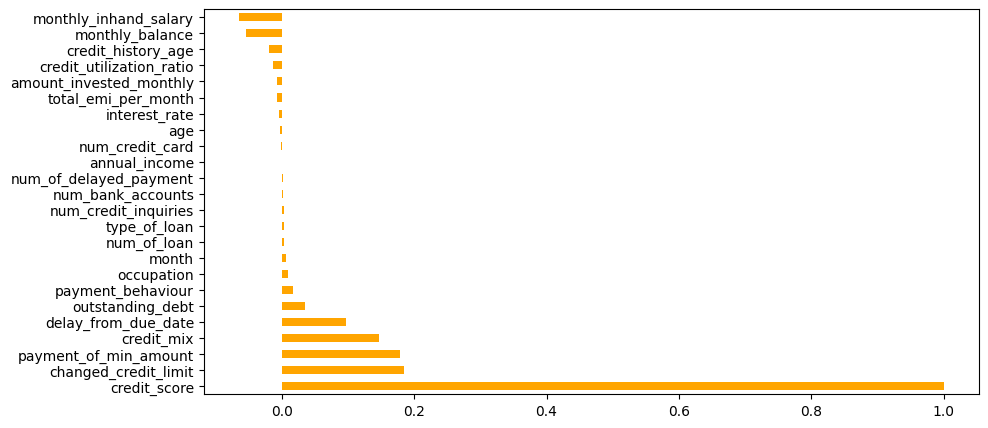

In [6]:
train_df.corr()['credit_score'].sort_values(ascending=False).plot(kind='barh', figsize=(10, 5), color='orange')

In [7]:
corr=train_df.corr()['credit_score'].sort_values(ascending=False).reset_index()

In [8]:
corr.head()

,index,credit_score
0,credit_score,1.000000
1,changed_credit_limit,0.184853
2,payment_of_min_amount,0.178674
3,credit_mix,0.147379
4,delay_from_due_date,0.097128


In [9]:
corr[corr['credit_score']>0.1]['index'].values.tolist()

['credit_score', 'changed_credit_limit', 'payment_of_min_amount', 'credit_mix']

In [10]:
train_df=train_df[['credit_score',
 'payment_of_min_amount',
 'changed_credit_limit',
 'credit_mix',
 'delay_from_due_date',
 'interest_rate',
 'num_bank_accounts']]

test_df=test_df[[
 'payment_of_min_amount',
 'changed_credit_limit',
 'credit_mix',
 'delay_from_due_date',
 'interest_rate',
 'num_bank_accounts']]

In [11]:
train_df.isnull().sum()

credit_score             0
payment_of_min_amount    0
changed_credit_limit     0
credit_mix               0
delay_from_due_date      0
interest_rate            0
num_bank_accounts        0
dtype: int64

In [12]:
train_df.head()

,credit_score,payment_of_min_amount,changed_credit_limit,credit_mix,delay_from_due_date,interest_rate,num_bank_accounts
0,0,1,0.408516,3,0.111111,0.000345,0.002223
1,0,1,0.293441,1,0.138889,0.000345,0.002223
2,0,1,0.408516,1,0.152778,0.000345,0.002223
3,0,1,0.362486,1,0.180556,0.000345,0.002223
4,0,1,0.319908,1,0.166667,0.000863,0.001668


In [13]:
train_df.describe()

,credit_score,payment_of_min_amount,changed_credit_limit,credit_mix,delay_from_due_date,interest_rate,num_bank_accounts
count,74037.000000,74037.000000,74037.000000,74037.000000,74037.000000,74037.000000,74037.000000
mean,1.355619,1.403974,0.388237,1.582425,0.361731,0.012459,0.010096
std,0.764207,0.692618,0.155934,1.013045,0.206452,0.081096,0.065242
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.271807,1.000000,0.208333,0.001208,0.002223
50%,2.000000,2.000000,0.365708,2.000000,0.319444,0.002070,0.003891
75%,2.000000,2.000000,0.491139,2.000000,0.458333,0.003278,0.004447
max,2.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000


In [14]:
x_train=train_df.drop(columns=['credit_score'], axis=1)
y_train=train_df['credit_score']
x_test=test_df.copy()
x_train.shape, y_train.shape, x_test.shape

((74037, 6), (74037,), (36993, 6))

In [15]:
from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import RandomForestClassifier  
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define a dictionary for the models
model_list = dict(
   
    tree=DecisionTreeClassifier(criterion='entropy', random_state=0) ,
    forest=RandomForestClassifier(n_estimators= 50, criterion="entropy")  
)

# Store evaluation results in a list
results = []

# Assuming X_train, y_train, X_test, y_test are already defined
for key, model in model_list.items():
    print('Training model:', key)
    # Train the model
    model.fit(x_train, y_train)
    
    # Make predictions
    y_pred = model.predict(x_test)

    print( accuracy_score(y_train, model.predict(x_train)))
    print('*'*100)

Training model: tree
0.9444737090914003
****************************************************************************************************
Training model: forest
0.9442305874089982
****************************************************************************************************


In [18]:
model=RandomForestClassifier(n_estimators= 50, criterion="entropy")  
model.fit(x_train, y_train)


RandomForestClassifier(criterion='entropy', n_estimators=50)

In [20]:
x_test=test_df.values


In [24]:
model.predict(x_test[0].reshape(1, -1))

array([2])

In [39]:
print('Actual :-',y_train[0])
print('Predicted :-',model.predict(x_train.iloc[0].values.reshape(1, -1))[0])

Actual :- 0
Predicted :- 0


In [40]:
def x_train_predicted(id):
    print('Actual :-',y_train[id])
    print('Predicted :-',model.predict(x_train.iloc[id].values.reshape(1, -1))[0])

In [56]:
x_train_predicted(624)

Actual :- 1
Predicted :- 1
